In [1]:
import pandas as pd
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/_isrinukollipoti/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/_isrinukollipoti/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/_isrinukollipoti/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/_isr

In [2]:
hate_comment = pd.read_csv("/Users/_isrinukollipoti/Downloads/liar_dataset/train.csv",header=None)

In [3]:
hate_comment.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [4]:
hate_comment.columns= ["the_ID",
"the_label",
"the_statement",
"the_subject(s)",
"the_speaker",
"the_speaker's job title",
"the_state_info",
"the_party_affiliation",
"barely_true_counts",
"false_counts",
"half_true_counts",
"mostly_true_counts",
"pants_on fire_counts",
"the_context_(venue_or_location_of_the_speech_or_statement)"]

In [5]:
hate_comment["the_label"].unique()

array(['FALSE', 'half-true', 'mostly-true', 'TRUE', 'barely-true',
       'pants-fire'], dtype=object)

In [6]:
filter = hate_comment["the_statement"] != ""
hate_comment = hate_comment[filter]
hate_comment = hate_comment.dropna()

In [7]:
hate_comment["the_label"].str.lower()

0              false
1          half-true
2        mostly-true
5               true
7          half-true
            ...     
10227     pants-fire
10228    barely-true
10230    barely-true
10231      half-true
10239     pants-fire
Name: the_label, Length: 6724, dtype: object

In [8]:
hate_comment.head()

,the_ID,the_label,the_statement,the_subject(s),the_speaker,the_speaker's job title,the_state_info,the_party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on fire_counts,the_context_(venue_or_location_of_the_speech_or_statement)
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
5,12465.json,TRUE,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."


In [9]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [52]:
import re
X = []
sentences = list(hate_comment["the_statement"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = hate_comment["the_label"].values

In [53]:
y = pd.get_dummies(y)

In [54]:
y

,FALSE,TRUE,barely-true,half-true,mostly-true,pants-fire
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
6719,0,0,0,0,0,1
6720,0,0,1,0,0,0
6721,0,0,1,0,0,0
6722,0,0,0,1,0,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [15]:
import os
os.chdir("Downloads")

In [79]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('./glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [72]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(6, activation='softmax')(LSTM_Layer_1)
print(LSTM_Layer_1.shape)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

(?, 128)


In [80]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(6, activation='sigmoid')(LSTM_Layer_1)
print(LSTM_Layer_1.shape)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

(?, 128)


In [65]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 200)               0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 200, 100)          826000    
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               117248    
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 774       
Total params: 944,022
Trainable params: 118,022
Non-trainable params: 826,000
_________________________________________________________________
None


In [83]:
history = model.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.2,validation_data=(X_test,y_test))

Train on 5379 samples, validate on 1345 samples
Epoch 1/5
5379/5379 [==============================] - 31s 6ms/step - loss: 0.4421 - acc: 0.8334 - val_loss: 0.4389 - val_acc: 0.8333
Epoch 2/5
5379/5379 [==============================] - 29s 5ms/step - loss: 0.4420 - acc: 0.8334 - val_loss: 0.4387 - val_acc: 0.8333
Epoch 3/5
5379/5379 [==============================] - 29s 5ms/step - loss: 0.4423 - acc: 0.8334 - val_loss: 0.4385 - val_acc: 0.8333
Epoch 4/5
5379/5379 [==============================] - 30s 6ms/step - loss: 0.4419 - acc: 0.8334 - val_loss: 0.4393 - val_acc: 0.8333
Epoch 5/5
5379/5379 [==============================] - 35s 7ms/step - loss: 0.4421 - acc: 0.8334 - val_loss: 0.4383 - val_acc: 0.8333


In [84]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

1345/1345 [==============================] - 1s 1ms/step
Test Score: 0.4383066211048112
Test Accuracy: 0.8333333134651184


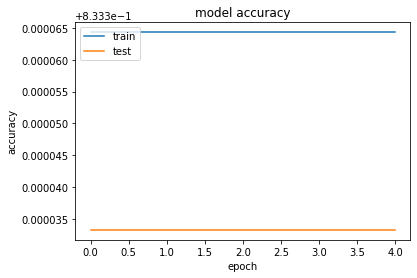

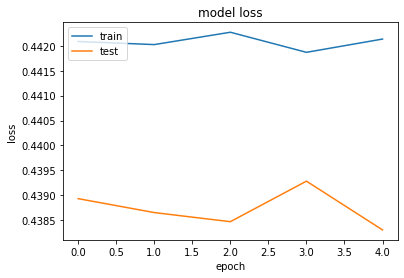

In [85]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()